In [1]:
from dem_stitcher.stitcher import download_dem 
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Bay Area
bounds: list = [-121.5, 34.95, -120.2, 36.25]
dem_name: str = 'glo_30'
save_raw_tiles: bool = False
force_agi_read: bool = True
test_dir: str = '.'

In [3]:
# Parameters
dem_name = "srtm_v3"
test_dir = "/Users/cmarshak/bekaert-team/dem-stitcher/tests"


# Check Download

In [4]:
%%time

out_path = download_dem(bounds, 
                        dem_name, 
                        f'{test_dir}/{dem_name}_test',
                        save_raw_tiles=save_raw_tiles,
                        # More than 5 workers can cause timeout errors.
                        max_workers=5,
                        force_agi_read_for_geoid=force_agi_read)
out_path

CPU times: user 3.82 s, sys: 2.02 s, total: 5.84 s
Wall time: 15.6 s


PosixPath('/Users/cmarshak/bekaert-team/dem-stitcher/tests/srtm_v3_test/srtm_v3.dem.wgs84')

In [5]:
with rasterio.open(out_path) as ds:
    X_0 = ds.read(1)
    p_0 = ds.profile

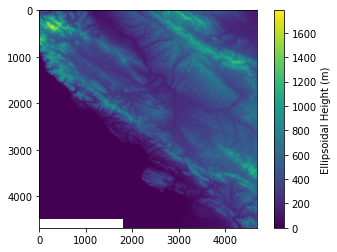

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(X_0, vmin=0)
fig.colorbar(im, label='Ellipsoidal Height (m)')

Remove all data files.

In [7]:
data_dir = out_path.parents[0]
[file.unlink() for file in data_dir.glob('*')]
data_dir.rmdir()